# Analyze properties of chemical substances

In [29]:
import pandas as pd
import numpy as np
%matplotlib inline

## Read the unstructured data from a text file and create a dictionary

In [4]:
chem_data_file_name = "F:\\My Documents\\components.cif.txt"
chem_data_items = []

# Builds the chem_data_items list.
begin = 49
end = -2
chem_data_file = open(chem_data_file_name, "r")
for k,line in enumerate(chem_data_file.readlines()):
    if k>10000:
        break
    if line.startswith("data"):
        chem_data_items.append({})
    else:
        if line.startswith("_chem_comp.id"):
            chem_data_items[-1].update({"id": line[begin:end]})
        elif line.startswith("_chem_comp.name"):
            chem_data_items[-1].update({"name": line[begin:end]})
        elif line.startswith("_chem_comp.type"):
            chem_data_items[-1].update({"type": line[begin:end]})
        elif line.startswith("_chem_comp.pdbx_type"):
            chem_data_items[-1].update({"pdbx_type": line[begin:end]})
        elif line.startswith("_chem_comp.mon_nstd_parent_comp_id"):
            chem_data_items[-1].update({"mon_nstd_parent_comp_id": line[begin:end]})
        elif line.startswith("_chem_comp.three_letter_code"):
            chem_data_items[-1].update({"three_letter_code": line[begin:end]})
        elif line.startswith("_chem_comp.pdbx_model_coordinates_db_code"):
            chem_data_items[-1].update({"pdb_code": line[begin:end]})
    if k%1000==0:
        print k,
chem_data_file.close()

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000


## Read the dictionary into a Pandas Data Frame

In [10]:
df = pd.DataFrame.from_dict(chem_data_items, orient='columns', dtype=None)

In [26]:
#just check the shape
df.shape

(55, 7)

In [27]:
#visualize a sample
df.head()

,id,mon_nstd_parent_comp_id,name,pdb_code,pdbx_type,three_letter_code,type
0,000,?,"""methyl hydrogen carbonate""",3LIN,ATOMP,000,NON-POLYMER
1,001,?,"""1-[2,2-DIFLUORO-2-(3,4,5-TRIMETHOXY-PHENYL)-A...",1J4R,HETAIN,001,NON-POLYMER
2,002,?,"""N-[(2R)-2-BENZYL-4-(HYDROXYAMINO)-4-OXOBUTANO...",2FV9,HETAIN,002,NON-POLYMER
3,003,?,"""5-METHYL-7-(2-METHYLPROPYL)-2-(NAPHTHALEN-1-Y...",?,HETAIN,003,NON-POLYMER
4,004,?,"""(2S)-amino(phenyl)ethanoic acid""",3LIN,ATOMP,004,"""L-PEPTIDE LINKING"""


## Examples of counts and other basic analytics

In [17]:
#get the top values by volume
df.type.value_counts()

NON-POLYMER            25
peptide-like           23
"D-PEPTIDE LINKING"     2
"L-PEPTIDE LINKING"     2
PEPTIDE-LIKE            1
non-polymer             1
"PEPTIDE LINKING"       1
Name: type, dtype: int64

In [18]:
#same as before but get % instead of actual counts
df.type.value_counts(normalize=True)

NON-POLYMER            0.454545
peptide-like           0.418182
"D-PEPTIDE LINKING"    0.036364
"L-PEPTIDE LINKING"    0.036364
PEPTIDE-LIKE           0.018182
non-polymer            0.018182
"PEPTIDE LINKING"      0.018182
Name: type, dtype: float64

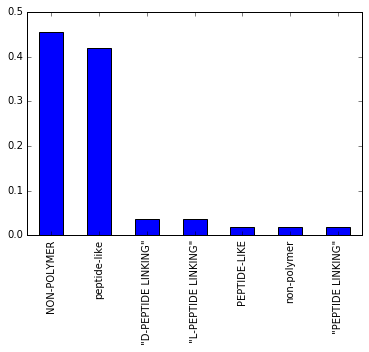

In [31]:
#could also plot the data
df.type.value_counts(normalize=True).plot(kind='bar')

In [22]:
#you can slice the data, for example filter only on one type
df_peplike = df[df.type == 'peptide-like']
#and then look at the distribution of pdbx_type on the filetered data
df_peplike.pdbx_type.value_counts(normalize=True)

HETAIN    0.913043
ATOMP     0.086957
Name: pdbx_type, dtype: float64

In [25]:
#you can count by goups. For example: distribution of type by pdbx_type  
df.groupby('pdbx_type').type.value_counts(normalize=True)

pdbx_type  type               
ATOMP      "D-PEPTIDE LINKING"    0.222222
           "L-PEPTIDE LINKING"    0.222222
           NON-POLYMER            0.222222
           peptide-like           0.222222
           "PEPTIDE LINKING"      0.111111
HETAIN     NON-POLYMER            0.500000
           peptide-like           0.456522
           PEPTIDE-LIKE           0.021739
           non-polymer            0.021739
dtype: float64